# Logistic Regression
#### Name: 沈家駿
#### Student ID: 0712223

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from IPython.display import display, Latex

## Data Generation

### First generate the y value 

In [2]:
y = np.random.choice(2, 1000)

### Then generate X

In [3]:
X = np.array([np.random.multivariate_normal([y[0], y[0]], [[0.1, 0], [0, 0.1]])])
for yi in range(1,1000):
    temp = np.random.multivariate_normal([y[yi], y[yi]], [[0.1, 0], [0, 0.1]])
    X = np.concatenate((X, [temp]))

### Transform data for plotting

In [4]:
x0_1, x1_1 = X[y==1].T
x0_2, x1_2 = X[y==0].T

### Plot the data

Text(0, 0.5, '$x_{i 1}$')

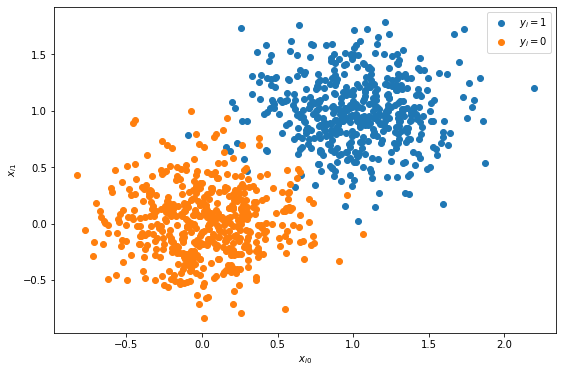

In [5]:
plt.figure(figsize=(9, 6))
plt.scatter(x0_1, x1_1, label=r'$y_i=1$')
plt.scatter(x0_2, x1_2, label=r'$y_i=0$')
plt.legend()
plt.xlabel(r'$x_{i 0}$')
plt.ylabel(r'$x_{i 1}$')

## Model Construction

In [6]:
clf = LogisticRegression().fit(X, y)

## Results 

### Show the model accuracy

In [7]:
print('Accuracy:',clf.score(X, y))

Accuracy: 0.985


### Show the model weights and the corresponded terms 

In [8]:
intercept = '{:.3}'.format(float(clf.intercept_[0]))
coef1 = ('+' if clf.coef_[0][0]>0 else '')+'{:.3}'.format(float(clf.coef_[0][0]))
coef2 = ('+' if clf.coef_[0][0]>0 else '')+'{:.3}'.format(float(clf.coef_[0][1]))

display(Latex(f'$y_i=L({intercept}{coef1} \\times x_{{i0}}{coef2} \\times x_{{i0}})$'))

<IPython.core.display.Latex object>

### Show the decision boundary
(First define a function, then call it later.)

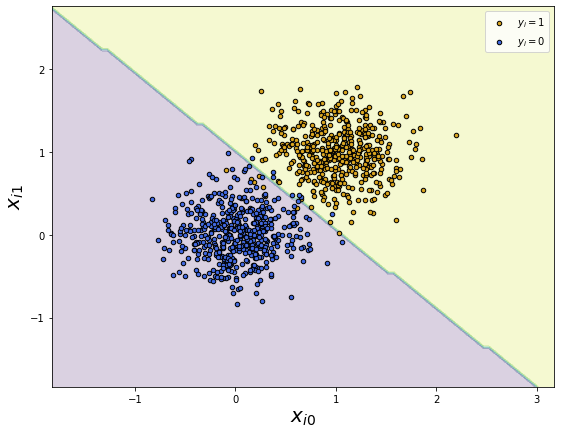

In [9]:
def plot_decision_boundaries(X, y, model, need_fit=False):
    if need_fit:
        model.fit(X, y)
    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    step = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(9, 7))
    plt.contourf(xx, yy, Z, alpha=0.2)
    pts1 = plt.scatter(X[pd.Series(y)==1, 0], X[pd.Series(y)==1, 1], c='goldenrod', alpha=1, s=20,linewidth = 1, edgecolors = 'black')
    pts2 = plt.scatter(X[pd.Series(y)==0, 0], X[pd.Series(y)==0, 1], c='royalblue', s=20, linewidth = 1, edgecolors = 'black',alpha=1)
    plt.xlabel(r'$x_{i 0}$', fontsize=20)
    plt.ylabel(r'$x_{i 1}$', fontsize=20)
    plt.legend([pts1, pts2], [r'$y_i=1$', r'$y_i=0$'])
plot_decision_boundaries(X, y, clf)